In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Validation, regularisation, and callbacks

## Validation Set
A validation set helps to evaluate a model while it is being trained. From the dataset that is used for training, a portion of the set is kept a side that is never used for training but the performance of the model is evaluated using the validation set during the training procedure. Let's look at an example

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset=load_diabetes()
print(type(diabetes_dataset))
print(diabetes_dataset["DESCR"])

<class 'sklearn.utils.Bunch'>
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood suga

In [3]:
# Save the input and target variables
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
data=diabetes_dataset['data']
print(type(data))
print(data.shape)
targets=diabetes_dataset['target']
print(type(targets))
print(targets.shape)

<class 'numpy.ndarray'>
(442, 10)
<class 'numpy.ndarray'>
(442,)


In [5]:
targets

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
# Normalise the target data (this will make clearer training curves)
targets=(targets-targets.mean(axis=0))/targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [7]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets=train_test_split(data, targets, test_size=0.2)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(353, 10)
(89, 10)
(353,)
(89,)


#### Train a feedforward neural network model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# Build the model
model=Sequential([
                  Dense(256,activation='relu', input_shape=(train_data.shape[1],)),
                  Dense(128,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(1)
])
    



In [10]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [12]:
# Train the model, with some of the data reserved for validation
history=model.fit(train_data, train_targets, epochs=200,
                  validation_split=0.1, batch_size=64, verbose=False)


In [13]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

3/3 - 0s - loss: 1.0414 - mae: 0.7906 - 18ms/epoch - 6ms/step


[1.0413826704025269, 0.7905848622322083]

#### Plot the learning curves

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

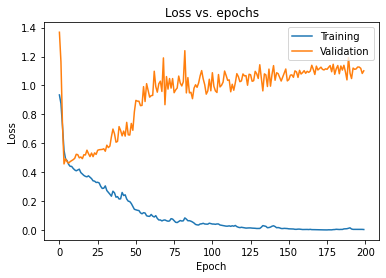

In [15]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

From the plot, we can see that the model has vastly overfit the trainning data. and it underperforms on the validation data.


## Regularisation

#### Adding regularisation with weight decay and dropout
We can reduce overfiting by regularization. In the following example, we will use L2 weight regularization which adds squared magnitude as a penalty to the loss function. This is also known as ridge regression. In our example, we add an optional kernel regularizer option. Here, just to remind everyone, weight matrices are also called the kernel, hence the name ‘kernel regularizer’. We can also add a bias regularizer in the same way as we add a regularizer for weights. We can also add a dropout layer which has the regularization ffect.



In [20]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# build the model with weight decay and dropout layers
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(256, activation="relu", kernel_regularizer =regularizers.l2(wd),input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer =regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer =regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer =regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer =regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer =regularizers.l2(wd),),
        Dropout(rate),
        Dense(1)
    ])
    return model


In [ ]:
# re-build the model with weight decay and dropout layers
model=get_regularised_model(1e-4,0.35)

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [24]:
# Train the model, with some of the data reserved for validation
history=model.fit(train_data, train_targets, epochs=200,
                  validation_split=0.1, batch_size=64, verbose=False)



In [26]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)


3/3 - 0s - loss: 0.7978 - mae: 0.6524 - 30ms/epoch - 10ms/step


[0.7977872490882874, 0.6524481773376465]

#### Plot the learning curves

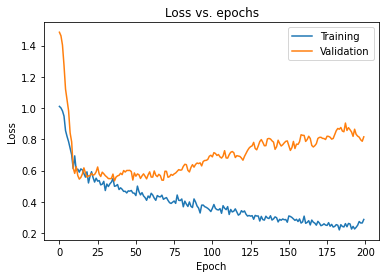

In [27]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##Callbacks
Callbacks are designed to monitor the loss in metrics at certain time points in a training run and perform some specified action that might depend on those losses in metric values. In TensorFlow 2, callbacks are stored in tensorflow.keras.callbacks module. The module provides a base class callback using which we can create a custom callback

In [28]:
from tensorflow.keras.callbacks import Callback

In [29]:
# Write a custom callback
class MyTrainingCallback(Callback):
  def on_train_begin(self, logs=None):
    print("Training starting...")
  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")
  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training: Starting batch {batch}")
  def on_train_batch_end(self, batch, logs=None):
    print(f"Traing: Finished batch {batch}")
  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")
  def on_train_end(self, logs=None):
    print("Finished training:")


In [30]:
# Re-build the model
model=get_regularised_model(1e-4,0.35)

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


#### Train the model with the callback

In [32]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets, epochs=5,validation_split=0.1, batch_size=64, 
          verbose=False, callbacks=[MyTrainingCallback()])



Training starting...
Starting epoch 0
Training: Starting batch 0
Traing: Finished batch 0
Training: Starting batch 1
Traing: Finished batch 1
Training: Starting batch 2
Traing: Finished batch 2
Training: Starting batch 3
Traing: Finished batch 3
Training: Starting batch 4
Traing: Finished batch 4
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Traing: Finished batch 0
Training: Starting batch 1
Traing: Finished batch 1
Training: Starting batch 2
Traing: Finished batch 2
Training: Starting batch 3
Traing: Finished batch 3
Training: Starting batch 4
Traing: Finished batch 4
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Traing: Finished batch 0
Training: Starting batch 1
Traing: Finished batch 1
Training: Starting batch 2
Traing: Finished batch 2
Training: Starting batch 3
Traing: Finished batch 3
Training: Starting batch 4
Traing: Finished batch 4
Finished epoch 2
Starting epoch 3
Training: Starting batch 0
Traing: Finished batch 0
Training: Starting batch 1
T

In [ ]:
class MyTestingCallback(Callback):
  def on_test_begin(self, logs=None):
    print("Testing starting...")
  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")
  def on_test_batch_begin(self, batch, logs=None):
    print(f"Testing: Starting batch {batch}")
  def on_test_batch_end(self, batch, logs=None):
    print(f"Testing: Finished batch {batch}")
  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")
  def on_test_end(self, logs=None):
    print("Finished testing:")


In [ ]:
# Evaluate the model



In [ ]:
# Make predictions with the model



***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model



In [ ]:
# Evaluate the model on the test set



In [ ]:
# Re-train the regularised model



In [ ]:
# Evaluate the model on the test set



#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()